In [14]:
#importing all the modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
#importing File 
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Name,Area
0,1,0,1,66278,3989,1,Con,Shenavan
1,2,0,0,64701,7076,1,Alphonso,Shubenka
2,3,1,1,28045,5659,1,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,Margot,Pakxong
4,5,0,0,67479,9894,0,Denice,Ardazubre


In [6]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         2000 non-null   int64 
 1   Own_House         2000 non-null   int64 
 2   Own_vehicle       2000 non-null   int64 
 3   Monthly_Salary    2000 non-null   int64 
 4   Standard_Savings  2000 non-null   int64 
 5   Bank_Debts        2000 non-null   int64 
 6   Name              2000 non-null   object
 7   Area              2000 non-null   object
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
df.describe()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.499500,0.501000,60217.760000,5477.723500,0.506000
std,577.494589,0.500125,0.500124,22785.967626,2610.025884,0.500089
min,1.000000,0.000000,0.000000,20007.000000,1001.000000,0.000000
25%,500.750000,0.000000,0.000000,40280.000000,3186.250000,0.000000
50%,1000.500000,0.000000,1.000000,60632.000000,5396.500000,1.000000
75%,1500.250000,1.000000,1.000000,80037.750000,7774.250000,1.000000
max,2000.000000,1.000000,1.000000,99998.000000,9993.000000,1.000000


In [9]:
#using label encoding for converting 'Area' column to numerical column
df['label'] = LabelEncoder().fit_transform(df['Area'])

In [10]:
data = df.drop(['Person_ID','Name','Area'],axis = 1)

In [11]:
data.shape

(2000, 6)

In [12]:
#since we have 6 columns we can not plot the data into 2d panel so we are doing pca
x_pca = PCA(n_components=2).fit_transform(data)

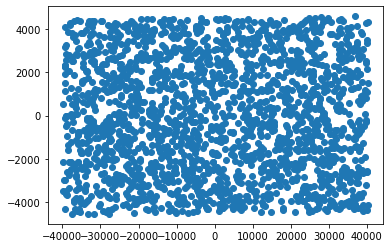

In [15]:
plt.scatter(x_pca[:,0],x_pca[:,1])

In [17]:
# clusturing in group
pca = KMeans(n_clusters=4, random_state = 42).fit(x_pca)

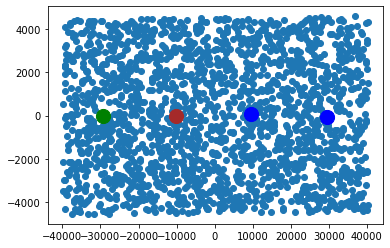

In [18]:
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.scatter(pca.cluster_centers_[0][0], pca.cluster_centers_[0][1], s=200, color='green')
plt.scatter(pca.cluster_centers_[1][0], pca.cluster_centers_[1][1], s=200, color='blue')
plt.scatter(pca.cluster_centers_[2][0], pca.cluster_centers_[2][1], s=200, color='BLUE')
plt.scatter(pca.cluster_centers_[3][0], pca.cluster_centers_[3][1], s=200, color='BROWN')

In [19]:
# using Standard Scaler to scale the continues and catagorical data into same data type
x_scale = StandardScaler().fit_transform(data)
x_pca_ss = PCA(n_components=2).fit_transform(x_scale)
SS = KMeans(n_clusters=4, random_state=42).fit(x_pca_ss)

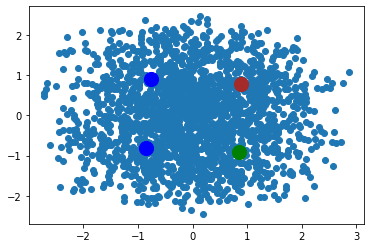

In [20]:
plt.scatter(x_pca_ss[:,0],x_pca_ss[:,1])
plt.scatter(SS.cluster_centers_[0][0], SS.cluster_centers_[0][1], s=200, color='green')
plt.scatter(SS.cluster_centers_[1][0], SS.cluster_centers_[1][1], s=200, color='blue')
plt.scatter(SS.cluster_centers_[2][0], SS.cluster_centers_[2][1], s=200, color='BLUE')
plt.scatter(SS.cluster_centers_[3][0], SS.cluster_centers_[3][1], s=200, color='BROWN')

In [21]:
# using minmax Scaler to scale the continues and catagorical data into same data type
from sklearn.preprocessing import MinMaxScaler
x_min = MinMaxScaler().fit_transform(data)
x_pca_minmax = PCA(n_components=2).fit_transform(x_min)
minmax = KMeans(n_clusters=4, random_state=42).fit(x_pca_minmax)

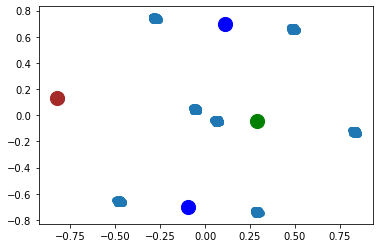

In [22]:
plt.scatter(x_pca_minmax[:,0],x_pca_minmax[:,1])
plt.scatter(minmax.cluster_centers_[0][0], minmax.cluster_centers_[0][1], s=200, color='green')
plt.scatter(minmax.cluster_centers_[1][0], minmax.cluster_centers_[1][1], s=200, color='blue')
plt.scatter(minmax.cluster_centers_[2][0], minmax.cluster_centers_[2][1], s=200, color='BLUE')
plt.scatter(minmax.cluster_centers_[3][0], minmax.cluster_centers_[3][1], s=200, color='BROWN')

In [23]:
#pd.Series(kmeans.labels_).to_csv('attempt12kmcpa.csv')
#pd.Series(SS.labels_).to_csv('attempt13sscpa.csv')
#pd.Series(minmax.labels_).to_csv('attempt14mincpa.csv')

In [24]:
######################Final file#######
# I have tried too many tehniques and final code which gives the 49.30 accuracy is as below


In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [26]:
df = pd.read_csv('data.csv')

In [27]:
from sklearn.preprocessing import LabelEncoder
df['label'] = LabelEncoder().fit_transform(df['Area'])

In [28]:
data = df.drop(['Person_ID','Name','Area'],axis = 1)

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state = 42).fit(data)


In [31]:
kmeans.labels_[:10]

array([0, 0, 1, 1, 0, 0, 3, 3, 3, 2])

In [32]:
pd.Series(kmeans.labels_).to_csv('predicta22(49)).csv')